# Análisis de viajes de taxis en Chicago


Una nueva empresa de viajes compartidos en Chicago necesita encontrar patrones de comportamiento con los datos disponibles. Conocer la preferencia de los pasajeros y el impacto de los factores externos en los viajes permitirá iniciar un servicio óptimo y competitivo en la ciudad.

Analizarémos datos de posibles competidores en el escenario local y medirémos la percepción y preferencia de los clientes respecto a qué compañías de taxis prefieren, cuáles son los barrios más frecuentados y el impacto de factores climatológicos en el servicio de transporte.


**Tabla de contenidos:**

 **1. Inicialización:**
 
    - Carga de datos
    - Exploración inicial
    - Conclusiones preliminares
    
    
 **3. Preprocesamiento de datos:**
 
    - Corrección en tipo de datos
    - Verificación de duplicados implícitos
    - Registros duplicados
    - Comprobación de valores
 
 
 **4. Análisis de datos:**
 
    - Planteamiento de interrogantes
    - Compañías de taxis y viajes realizados
    - Finalizaciones de viajes en barrios de Chicago
    
 **5. Pruebas de hipótesis:**
 
    - Pruebas de Levene
    - Pruebas T
    - Resultados finales
    
    
 **6. Conclusiones**

## Inicialización

Cargamos las librerías necesarias:

In [1]:
# Cargamos las librerías
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

### Carga de datos

Además de los datos trabajados anteriormente, se nos proporcionan tres nuevos archivos que examinarémos a continuación.

In [2]:
# Primer archivo de resultados
zuber_sql_result_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
# Segundo archivo de resultados
zuber_sql_result_04 = pd.read_csv('/datasets/project_sql_result_04.csv')
# Tercer archivo de resultados
zuber_sql_result_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

### Exploración inicial de los datos

Estos tres dataset seran tratados para estudiar los datos que contienen. El orden de exploración de los datos para cada dataset será el siguiente:

    1. Vista a la información general.
    2. Descripción de datos en base a la información previa proporcionada.
    3. Tipo de datos.
    4. Observación de algunos valores del dataset.
    5. Comprobación de datos ausentes en el dataset.

#### Primer dataset: zuber_sql_result_01

Damos una vista a la información general.

In [3]:
# Información general
zuber_sql_result_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Tenemos dos columnas en este dataset. De acuerdo a la información entregada y la vista en la información general, tenemos:

**1. company_name** 

    - Descripción: nombre de la empresa de taxis.
    - Tipo de datos: object.

**2. trips_amount**

    - Descripción: número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.
    - Tipo de datos: int64.


In [4]:
# Vista de los primeros cinco valores
zuber_sql_result_01.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Este primer dataset contiene 64 registros en total el cual no presenta valores ausentes en alguna de sus columnas. Lo confirmamos a continuación:

In [5]:
# Valores ausentes
zuber_sql_result_01.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

#### Segundo dataset: zuber_sql_result_04

Damos una vista a la información general.

In [6]:
# Información general
zuber_sql_result_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Tenemos dos columnas en este dataset. De acuerdo a la información entregada y la vista en la información general, tenemos:

**1. dropoff_location_name** 

    - Descripción: : barrios de Chicago donde finalizaron los viajes.
    - Tipo de datos: object.

**2. average_trips**

    - Descripción: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
    - Tipo de datos: float64.


In [7]:
# Vista de los primeros cinco valores
zuber_sql_result_04.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Este segundo dataset contiene 94 registros en total el cual no presenta valores ausentes en alguna de sus columnas. Lo confirmamos a continuación:

In [8]:
# Valores ausentes
zuber_sql_result_04.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

#### Tercer dataset: zuber_sql_result_07

Damos una vista a la información general.

In [9]:
# Información general
zuber_sql_result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Tenemos tres columnas en este dataset. De acuerdo a la información entregada y la vista en la información general, tenemos:

**1. start_ts** 

    - Descripción: : fecha y hora de la recogida.
    - Tipo de datos: object.

**2. weather_conditions**

    - Descripción: condiciones climáticas en el momento que comenzó el viaje.
    - Tipo de datos: object.

**2. duration_seconds**

    - Descripción: duración del viaje en segundos.
    - Tipo de datos: float64.

In [10]:
# Vista de los primeros cinco valores
zuber_sql_result_07.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Este tercer dataset contiene 1068 registros en total el cual no presenta valores ausentes en alguna de sus columnas. Lo confirmamos a continuación:

In [11]:
# Valores ausentes
zuber_sql_result_07.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

### Conclusiones preliminares de acuerdo a la información de los datos

Los archivos CSV que nos han entregado, fueron transformados en dos dataset que presentan información de empresas de taxis en Chicago en el periodo de Noviembre del año 2017.

El primer dataset nos muestra la información de los nombres de las empresas de taxis y la cantidad de viajes para cada una realizados en los días 15 y 16 de noviembre del 2017. Su información se presenta ordenada en dos columnas:

    - company_name
    - trips_amount
    
El segundo dataset nos entrega información de los barrios donde finalizaron los viajes y el promedio de viajes para cada uno en noviembre del 2017. La información se presenta en dos columnas:

    - dropoff_location_name
    - average_trips

El tercer dataset nos entrega información de los viajes desde el barrio "Loop" hasta el Aeropuerto Internacional O'Hare de Chicago.

    - start_ts
    - weather_conditions
    - duration_seconds


**Respecto a la cantidad de datos:**

- El primer dataset presenta 64 registros el segundo 94 y el tercero 1068.

- *Ningún dataset tiene registros ausentes*

**Respecto al tipo de datos:**
- Tanto *company_name* como *dropoff_location_name* se presentan como tipo Object en los primeros dataset

- Considerando que si queremos trabajar con "viajes cumplidos" estos deben ser del tipo entero; por un lado, *trips_amount* cumple al ser de tipo int64, pero por otro, *average_trips* debiera ser redondeado hacia abajo. Sería apropiado complementar la información de *average_trips* para ver cómo se recopilaron estos datos.

- Respecto al tercer dataset, la columna *start_ts* se presenta como tipo Object y podría transformarse a Datetime; necesitamos probar una hipótesis que enmarca un día de la semana, por lo tanto no nos sirve esta columna como Object. Respecto a las otras columnas, *duration_seconds* se puede modificar a tipo entero.

**Otros aspectos:**

- Es necesario verificar que los nombres tanto de las compañías de taxis como de los barrios de Chicago, no presenten duplicados implícitos.

- Se tendrá que revisar si existen registros duplicados.

- Comprobaremos si la cantidad de viajes y la cantidad promedio para barrios de Chicago presentan solo valores positivos.

## Preprocesamiento de datos

Resolveremos los pocos problemas que observamos en nuestros dos dataset. El preprocesamiento se realizará en el siguiente orden:

    1. Correción del tipo de datos.
    2. Verificación de duplicados implícitos.
    3. Registros duplicados.
    4. Comprobación de valores en cantidad de viajes.

### Corrección en tipo de datos

Primero, trabajaremos en el segundo dataset, referido a los barrios de Chicago y los promedios de viajes. Redondearemos el promedio de viajes hacia abajo cambiando el tipo de datos a int64 con el método astype; lo mismo será aplicado con los segundos en el tercer dataset.

In [12]:
# Cambiamos el tipo de datos de toda la columna
zuber_sql_result_04['average_trips'] = zuber_sql_result_04['average_trips'].astype('int')
# Vemos como quedan los valores
zuber_sql_result_04['average_trips']

0     10727
1      9523
2      6664
3      5163
4      2546
      ...  
89        3
90        3
91        2
92        1
93        1
Name: average_trips, Length: 94, dtype: int64

Cambio de segundos a tipo entero en tercer dataset:

In [13]:
# Cambiamos el tipo de datos de toda la columna
zuber_sql_result_07['duration_seconds'] = zuber_sql_result_07['duration_seconds'].astype('int')
# Vemos como quedan los valores
zuber_sql_result_07['duration_seconds']

0       2410
1       1920
2       1543
3       2512
4       1440
        ... 
1063       0
1064    1318
1065    2100
1066    1380
1067    2834
Name: duration_seconds, Length: 1068, dtype: int64

**Ahora, cambiamos el tipo de datos la fecha de *start_ts* en el tercer dataset:**

In [14]:
# Vemos la estructura de los datos de la columna start_ts
zuber_sql_result_07['start_ts'].head()

0    2017-11-25 16:00:00
1    2017-11-25 14:00:00
2    2017-11-25 12:00:00
3    2017-11-04 10:00:00
4    2017-11-11 07:00:00
Name: start_ts, dtype: object

In [15]:
# cambiamos los datos a tipo datetime
zuber_sql_result_07['start_ts'] = pd.to_datetime(zuber_sql_result_07['start_ts'], format='%Y-%m-%d %H:%M:%S')

### Verificación de duplicados implícitos

Primero comprobaremos en el primer dataset la columna *company_name*:

Revisamos los nombres de las compañías de taxis a simple vista para ver si existe algún duplicado debido a un error de escritura.

In [16]:
# Nombres únicos ordenados por abecedario
zuber_sql_result_01['company_name'].sort_values().unique()

array(['0118 - 42111 Godfrey S. Awir', '1085 - 72312 N and W Cab Co',
       '1469 - 64126 Omar Jada', '2092 - 61288 Sbeih Company',
       '2192 - 73487 Zeymane Corp', '2241 - 44667 - Felman Corp',
       '24 Seven Taxi', '2733 - 74600 Benny Jona',
       '2809 - 95474 C & D Cab Co Inc.', '2823 - 73307 Lee Express Inc',
       '3011 - 66308 JBL Cab Inc.', '303 Taxi',
       '3556 - 36214 RC Andrews Cab', '3591 - 63480 Chuks Cab',
       '3620 - 52292 David K. Cab Corp.',
       '3623 - 72222 Arrington Enterprises', '3721 - Santamaria Express',
       '4053 - 40193 Adwar H. Nikola', '4615 - 83503 Tyrone Henderson',
       '4623 - 27290 Jay Kim', '5 Star Taxi', '5006 - 39261 Salifu Bawa',
       '5062 - 34841 Sam Mestas', '5074 - 54002 Ahzmi Inc',
       '5874 - 73628 Sergey Cab Corp.', '5997 - 65283 AW Services Inc.',
       '6057 - 24657 Richard Addo', '6574 - Babylon Express Inc.',
       '6742 - 83735 Tasha Ride Inc', '6743 - 78771 Luhak Corp',
       'American United', 'American Un

In [17]:
# Comprobamos la cantidad de nombres únicos
zuber_sql_result_01['company_name'].nunique()

64

Tenemos 64 nombres únicos, por lo tanto, coincide con el total de registros para la columna. No existen nombres de empresas duplicadas.

**Ahora, comprobamos la columna *dropoff_location_name* en el segundo dataset:**


Revisamos los nombres de los barrios de Chicago a simple vista para detectar algún duplicado por error de escritura.

In [18]:
# Nombres únicos ordenados por abecedario
zuber_sql_result_04['dropoff_location_name'].sort_values().unique()

array(['Albany Park', 'Andersonville', 'Archer Heights', 'Armour Square',
       'Ashburn', 'Auburn Gresham', 'Austin', 'Avalon Park', 'Avondale',
       'Belmont Cragin', 'Beverly', 'Boystown', 'Bridgeport',
       'Brighton Park', 'Bucktown', 'Burnside', 'Calumet Heights',
       'Chatham', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Douglas',
       'Dunning', 'East Side', 'East Village', 'Edgewater', 'Edison Park',
       'Englewood', 'Fuller Park', 'Gage Park', 'Garfield Park',
       'Garfield Ridge', 'Gold Coast', 'Grand Boulevard',
       'Grand Crossing', 'Grant Park', 'Hegewisch', 'Hermosa',
       'Humboldt Park', 'Hyde Park', 'Irving Park', 'Jackson Park',
       'Jefferson Park', 'Kenwood', 'Lake View', 'Lincoln Park',
       'Lincoln Square', 'Little Italy, UIC', 'Little Village',
       'Logan Square', 'Loop', 'Lower West Side', 'Mckinley Park',
       'Montclare', 'Morgan Park', 'Mount Greenwood', 'Museum Campus',
       'Near South Side', 'New City', 'North Center', 'Nor

In [19]:
# Comprobamos la cantidad de nombres únicos
zuber_sql_result_04['dropoff_location_name'].nunique()

94

Tenemos 94 nombres único correspondientes a los barrios de Chicago, los cuales coinciden con el total de datos para la columna. No existen nombres de barrios duplicados.

**Ahora, comprobamos la columna *weather_conditions* en el tercer dataset:**

In [20]:
# Nombres únicos ordenados por abecedario
zuber_sql_result_07['weather_conditions'].sort_values().unique()

array(['Bad', 'Good'], dtype=object)

Solo tenemos dos valores, "Bad" y "Good".

### Registros duplicados

Comprobaremos que ambos dataset no presenten registros duplicados.

In [21]:
# Registros duplicados en primer dataset
zuber_sql_result_01.duplicated().sum()

0

In [22]:
# Registros duplicados en segundo dataset
zuber_sql_result_04.duplicated().sum()

0

In [23]:
# Registros duplicados en tercer dataset
zuber_sql_result_07.duplicated().sum()

197

**Tenemos 197 registros duplicados en el tercer dataset. Considerando las características de los datos, es posible que se presenten registros similares. Tenemos 1068 registros con datos de: fecha y hora de salida, condición climática y tiempo de duración del viaje desde el barrio "Loop" hasta el aeropuerto de Chicago. Si se repite la fecha y hora, es muy probable que la condición climática sea la misma; y si consideramos que es para un trayecto fijo, también existe una probabilidad de que los tiempos de duración se repitan. Por lo tanto, no eliminaremos estos registros duplicados.**

### Comprobación de valores 

Usaremos el método *describe* para observar los valores mínimos y máximos en las columnas *trips_amount* para el primer dataset y *average_trips* para el segundo.

#### Viajes para cada compañía de taxis - Primer dataset

In [24]:
# Cantidades en viajes para cada compañía de taxis
zuber_sql_result_01['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

De las 64 compañías, tenemos que el mínimo de viaje es de 2 y el máximo es de 19558. Una diferencia cuantiosa considerando que la mediana es de aproximadamente 178 viajes por compañía. Observaremos todo esto con más calma en el análisis propiamente tal de los datos.

*A considerar que la cantidad de viajes es solo para los días 15 y 16 de noviembre del año 2017.*

#### Promedio de viajes para distintos barrios de Chicago - Segundo dataset

In [25]:
# Cantidades en viajes para cada compañía de taxis
zuber_sql_result_04['average_trips'].describe()

count       94.000000
mean       599.478723
std       1714.555974
min          1.000000
25%         14.000000
50%         51.500000
75%        298.750000
max      10727.000000
Name: average_trips, dtype: float64

Tenemos 94 barrios distintos de chicago en los que finalizaron viajes. La cantidad de viajes finalizado mínima por barrio fue de 1 y la máxima de 10727. La mediana es de 51 viajes aproximadamente para cada barrio.

*Los viajes fueron efectuados en el mes de noviembre del año 2017.*

#### Tiempo de duración hasta el aeropuerto - Tercer dataset

In [26]:
zuber_sql_result_07['duration_seconds'].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Tenemos un registro con 0 segundos el cual deberíamos eliminar de nuestros datos. Revisaremos los 15 valores más bajos:

In [27]:
# Vemos los 15 valores más bajos de duración de viaje en segundos
zuber_sql_result_07['duration_seconds'].sort_values(ascending=False).tail(15)

879     1080
237     1074
713     1063
194     1020
874     1018
860      480
203      480
424      420
15        60
168        0
1063       0
552        0
801        0
163        0
204        0
Name: duration_seconds, dtype: int64

Tenemos el índice del registro acompañado de la duración en segundos. A partir de los 420 segundos parece un valor más razonable, considerando que igual son valores bajos considerando la mediana de 1980 segundos y un primer cuartil que se acerca a los 1438 segundos. 

Eliminaremos los registros que tardan menos de 1 minuto y guardaremos los datos limpios en una nueva variable.

In [28]:
# Creamos un nuevo dataframe
new_zuber_sql_result_07 = zuber_sql_result_07.query('duration_seconds > 60')

# Vemos la cantidad de datos en nuestra nueva tabla
new_zuber_sql_result_07.count()

start_ts              1061
weather_conditions    1061
duration_seconds      1061
dtype: int64

Perfecto, ya hemos eliminado los 7 registros con duraciones muy bajas.

### Conclusiones del preprocesamiento de datos

Los primeros dos dataset presentan datos ordenados y sin presencia de registros duplicados. 

- Se realizó una comprobación para verificar duplicados implícitos en los nombres de las compañías y en los nombres de los barrios de Chicago. Ambos presentaron información limpia respecto a esto.


- Se corrigió el tipo de datos para el dataset *zuber_sql_result_04* en su columna *average_trips*. El tipo de datos se cambió a int64 dado que la cantidad de viajes tiene que expresarse en valores enteros.


- Los valores mínimos y máximos para la cantidad de viajes de cada compañía y viajes concluídos en cada barrio presentan valores razonables. Si bien, parecen muy distantes entre si (considerando una media bastante más baja que la cantidad máxima), esto se analizará en la siguiente sección.

Respecto al tercer dataset:

- Se cambiaron los siguientes tipos de datos:
    - start_ts: de object a datetime
    - duration_seconds: de float a int. 
    
    
- Se eliminaron 7 registros que presentan una duración de viajes muy baja.

- Se encontraron 197 registros duplicados. No se eliminaron ya que debido a la naturaleza de los datos, es probable que se puedan repetir los registros.

## Análisis de datos

Tenemos dos tablas a analizar: 

    1. Empresas de taxis con la cantidad de viajes realizados (zuber_sql_result_01).
    2. Barrios de chicago con la cantidad promedio de viajes finalizados en cada uno (zuber_sql_result_04).
    
Previo al análisis, plantearemos algunas interrogantes que serán resueltas en el desarrollo de este mismo. Estas preguntas estarán dirigidas a la información que poseemos en cada dataset y nos ayudarán  a dirigir nuestro aprendizaje y estudio de los datos.

### Planteamiento de interrogantes

#### Dataset 1: Empresas de taxis y cantidad de viajes realizados.

Un punto importante a considerar es que la **cantidad de viajes realizados es en base a dos días: 15 y 16 de noviembre del año 2017.** Con esto, tenemos que la cantidad de viajes total para cada compañía está agrupada en dos días.


Además, debemos recordar que **el propósito de nuestra investigación es comprender las preferencias de los pasajeros en los viajes.**

Teniendo esto claro, nos hacemos las siguientes preguntas:
 - ¿Cuál es la cantidad de viajes total para estos dos días?
 - ¿Cuáles son las compañías de taxis más populares?
 - ¿Cuál es el promedio diario de viajes para las compañías más populares?
 - ¿Es muy grande la diferencia en cantidad de viajes de las compañías más populares respecto de la media de todas las compañías?
 - ¿Cuál es el porcentaje de participación de cada compañía para los viajes en estos dos días?
 - ¿Se puede inferir información adicional mediante el nombre de las compañías y sus cantidades de viajes?

#### Dataset 2: Barrios de Chicago y cantidad de viajes concluídos en cada uno.

Debemos recordar que esta información **considera todo el mes de Noviembre**, a diferencia del dataset anterior que solo considera dos días.

Planteamos las siguientes preguntas:
- ¿Cuál es el total de viajes en Chicago para Noviembre?
- ¿Cuál es el promedio diario para toda la ciudad y para cada barrio?
- ¿Cuales son los principales barrios de destino?
- ¿Existe una diferencia muy grande en la cantidad de viajes para los destinos más visitados respecto a la media?
- ¿Qué información adicional podríamos agregar para entender la preferencia de los clientes?

Las preguntas planteadas para los dataset nos servirán de base para explorar en la información recopilada. Ahora, procedemos a responderlas.

### Compañías de taxis y viajes realizados

#### Enriquecimiento de datos

Por medio de las preguntas, nos dimos cuenta que podemos mejorar nuestra tabla agregando algunas columnas. Los datos que podemos agregar a partir de la cantidad de viajes, son:

    - Promedio de viajes diario para cada compañía.
    - Porcentaje de participación de la compañía.

Veamos como es nuestra tabla actual:

In [29]:
# Mostramos los cinco primeros valores
zuber_sql_result_01.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [30]:
# Creamos la columna 'daily_trips' para señalar los viajes diarios
zuber_sql_result_01['daily_trips'] = np.floor(zuber_sql_result_01['trips_amount'] / 2)

# Cambiamos el tipo de datos
zuber_sql_result_01['daily_trips'] = zuber_sql_result_01['daily_trips'].astype('int')

# Visualizamos la tabla
zuber_sql_result_01.head(5)

,company_name,trips_amount,daily_trips
0,Flash Cab,19558,9779
1,Taxi Affiliation Services,11422,5711
2,Medallion Leasing,10367,5183
3,Yellow Cab,9888,4944
4,Taxi Affiliation Service Yellow,9299,4649


Ya tenemos la cantidad de viajes diarios para cada compañía, **bajo la suposición de que el 15 de noviembre tuvo la misma cantidad de viajes que el 16 de noviembre.**

Ahora agregamos una columna para tener el porcentaje de participación de cada compañía:

In [31]:
# Creamos la nueva columna 'percent'
zuber_sql_result_01['percent'] = (zuber_sql_result_01['trips_amount'] / zuber_sql_result_01['trips_amount'].sum()) * 100
# Redondeamos a dos decimales
zuber_sql_result_01['percent'] = round(zuber_sql_result_01['percent'], 2)
# Mostramos como queda la tabla
zuber_sql_result_01.head(5)

,company_name,trips_amount,daily_trips,percent
0,Flash Cab,19558,9779,14.24
1,Taxi Affiliation Services,11422,5711,8.32
2,Medallion Leasing,10367,5183,7.55
3,Yellow Cab,9888,4944,7.20
4,Taxi Affiliation Service Yellow,9299,4649,6.77


#### Compañías de viajes más populares

Comenzamos desde el punto que nuestro dataset contiene **64 compañías de taxis**.

Primero, vamos a observar la cantidad total de viajes para el 15 y 16 de noviembre del 2017 en estas 64 compañías.

In [32]:
# Cantidad de viajes total
zuber_sql_result_01['trips_amount'].sum()

137311

Para estos dos días de noviembre hubo **137 mil viajes aproximadamente.** Veamos ahora cuales fueron las compañías con mayor representación.

In [33]:
zuber_sql_result_01.sort_values(by= 'trips_amount', ascending=False).head(10)

,company_name,trips_amount,daily_trips,percent
0,Flash Cab,19558,9779,14.24
1,Taxi Affiliation Services,11422,5711,8.32
2,Medallion Leasing,10367,5183,7.55
3,Yellow Cab,9888,4944,7.20
4,Taxi Affiliation Service Yellow,9299,4649,6.77
5,Chicago Carriage Cab Corp,9181,4590,6.69
6,City Service,8448,4224,6.15
7,Sun Taxi,7701,3850,5.61
8,Star North Management LLC,7455,3727,5.43
9,Blue Ribbon Taxi Association Inc.,5953,2976,4.34


- Flash Cab aparece en primer lugar con casi 20 mil viajes; el segundo y tercer lugar le siguen con 11 mil y 10 mil viajes aproximadamente, para luego ser seguidos por estrechos márgenes.
- El promedio de viajes diarios para Flash Cab es de casi 10 mil, con lo que alcanza un 14% de la participación en el mercado.

Veamos una representación gráfica para apreciar mejor la diferencia. Ajustaremos el gráfico solo a las 10 compañías con más viajes, de otra forma, el gráfico sería poco legible debido a la gran cantidad de compañías.

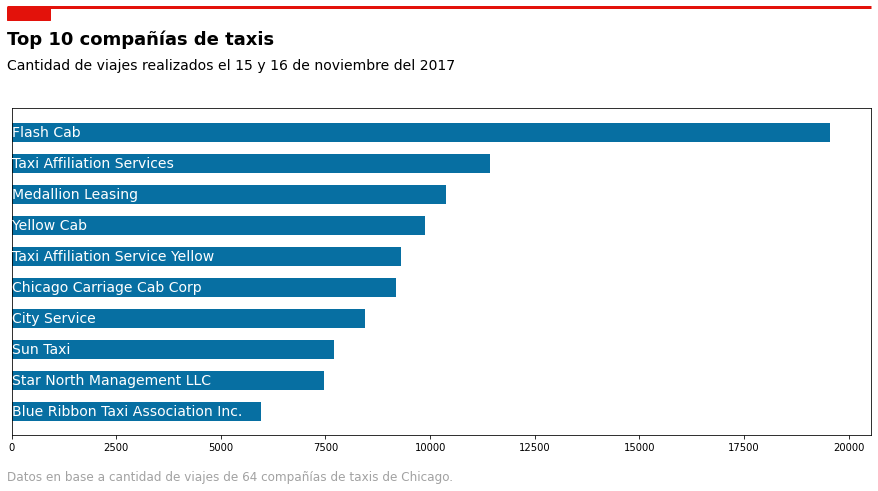

In [34]:
# Guardamos los nombres y cantidades de los 10 mejores en nuevas variables
top_companies = zuber_sql_result_01['company_name'].head(10)
top_trips_amount = zuber_sql_result_01['trips_amount'].head(10)

# Las ordenamos ascendentemente
top_companies = top_companies[::-1]
top_trips_amount = top_trips_amount.sort_values(ascending=True)

# La posición de las barras que nos permitirá determinar donde serán localizadas
y = [i * 0.9 for i in range(len(top_companies))]

# Los colores que usaremos en el gráfico
blue = "#076fa2"
red = "#E3120B"
grey = "#a2a2a2"

# Nuestro gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(y, top_trips_amount , height=0.55, align='edge', color=blue)

# Escondemos las etiquetas del eje y
ax.yaxis.set_visible(False)

# Agregamos las etiquetas
PAD = 0.3
for companies, trips, y_pos in zip(top_companies, top_trips_amount, y):
    ax.text(
        PAD, y_pos + 0.5 / 2, companies, 
        color='white', fontfamily='DejaVu Sans', fontsize=14, va="center",
        path_effects=None
    ) 

# Ajustamos la posición del gráfico
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.15)

# Añadimos el título
fig.text(
    0, 0.925, "Top 10 compañías de taxis", 
    fontsize=18, fontweight="bold", fontfamily='DejaVu Sans'
)
# Añadimos subtítulo
fig.text(
    0, 0.875, "Cantidad de viajes realizados el 15 y 16 de noviembre del 2017", 
    fontsize=14, fontfamily='DejaVu Sans'
)

# Leyenda bajo el gráfico
source = "Datos en base a cantidad de viajes de 64 compañías de taxis de Chicago."
fig.text(
    0, 0.06, source, color=grey, 
    fontsize=12, fontfamily='DejaVu Sans'
)

# Añadimos una línea y rectángulo para la presentación del gráfico
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=red, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=red))


- Se produce una gran diferencia de la compañía en primer lugar, prácticamente duplica en viajes a cualquier otra.
- A partir del segundo lugar, la competencia se estrecha y 8 compañías se mantienen en el rango sobre los 7500 viajes.

Vamos a representar en un gráfico circular, como se reparten la cantidad de viajes las 5 mejores compañías:

Text(0.5, 0, 'En base los viajes realizados el 15 y 16 de noviembre del 2017.')

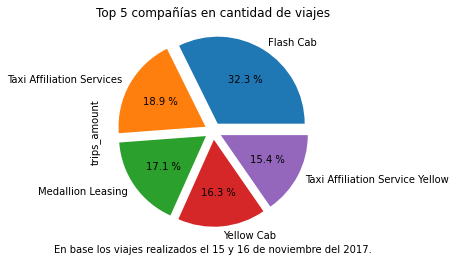

In [35]:
# Reasignamos el índice a los nombres de las compañías
top_cab_companies = zuber_sql_result_01.set_index('company_name')

# Creamos el gráfico circular
top_cab_companies['trips_amount'].head().plot(kind='pie', title= 'Top 5 compañías en cantidad de viajes', 
                                              figsize=(4,4), autopct='%0.1f %%', explode=(0.1,0.1,0.1,0.1,0.1))

plt.xlabel('En base los viajes realizados el 15 y 16 de noviembre del 2017.')

Si consideráramos solo las cinco mejores compañías, esta sería su distribución porcentual. Podemos ver que a pesar de la delantera de Flah Cab, la participación de las demás compañías es bastante equitativa.

Ahora, agruparemos las 59 compañías restantes que tienen una participación menor, pero que en su conjunto, representan un gran porcentaje. La incluiremos al gráfico circular y podremos apreciar la real influencia de estas cinco mejores compañías.

<AxesSubplot:title={'center':'Participación de compañías de taxis en Chicago'}, ylabel='trips_amount'>

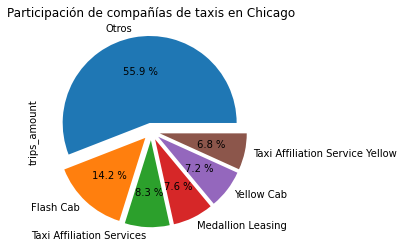

In [36]:
# Creamos una copia de nuestro dataset
grouped_companies_df = zuber_sql_result_01.copy(deep=True)

# Creamos un ciclo for para atribuir la categoría "otros" a partír del índice 5 ( del 0 al 4 son nuestro top 5)
for i in grouped_companies_df.index:
    if i > 4:
        grouped_companies_df.loc[i, 'company_name'] = 'Otros'

#Graficamos agregando la suma de compañías restantes
grouped_companies_df.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False).plot(
    kind='pie', title= 'Participación de compañías de taxis en Chicago', figsize=(4,4), autopct='%0.1f %%', 
    explode=(0.1,0.1,0.1,0.1,0.1,0.1))

#plt.xlabel('En base a la cantidad de viajes realizados el 15 y 16 de noviembre del 2017.')

- Las compañías que están fuera del Top 5, concentran un 56% de las preferencias (59 compañías de taxis); es decir, más de la mitad de los viajes se realizan en compañías que no alcanzan ni la mitad de viajes que la primera.
- Las cuatro compañías restantes tienen valores muy cercanos entre si, manteniendose entre el 9% y 6% de preferencias totales.

A pesar de la gran diferencia de Flash Cab, podemos notar que la distribución es bastante similar para las demás empresas. Esto da cuenta de la alta competitividad en este servicio.

Vamos a ver en números el detalle del gráfico:

In [37]:
# Tabla con valores
grouped_companies_df.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False)

company_name
Otros                              76777
Flash Cab                          19558
Taxi Affiliation Services          11422
Medallion Leasing                  10367
Yellow Cab                          9888
Taxi Affiliation Service Yellow     9299
Name: trips_amount, dtype: int64

Casi 80 mil viajes los realizan las 59 compañías que no entran en el Top 5; es decir, Flash Cab representa poco más de la cuarta parte de la cantidad de viajes que realizan las compañías con menos viajes.

Si consideramos la unión de solo dos empresas presentes en el Top 5 para hacer frente a Flash Cab, pueden llegar a igualar y hasta superar la cantidad de viajes. Lo mismo ocurre para la agrupación de compañías menores; de llegar a fusionar sus servicios, podrían alcanzar a cualquiera del top ya que en conjunto alcanzan el 56% de las preferencias.

Veamos qué tan distante se encuentra el primer lugar respecto de la media de viajes para las compañías:

In [38]:
zuber_sql_result_01['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

- La mediana tiende a 178 viajes por compañía, existiendo un mínimo de 2 viajes.
- Una cuarta parte (16 empresas) poseen una media de 21 viajes cada una.
- Otra cuarta parte tiene como promedio 2106 viajes cada una.

**Teniendo estos valores en cuenta, vemos que existe una gran brecha entre las compañías que se encuentran en el Top y al menos el 75% de las compañías que tienen menos viajes.**

*¿Qué podría explicar una diferencia tan grande?*

No tenemos más datos que nos permitan clarificar estas diferencias. Solo podemos especular de acuerdo a distintas condiciones dada la naturaleza del negocio. 

#### Elementos que podrían generar una diferencia en la cantidad de viajes

Con la información que tenemos, solo podemos observar los nombres de las compañías. Comparemos las 10 mejores con las 10 con menos viajes:

In [39]:
# Nombres de las 10 compañías con más viajes
zuber_sql_result_01['company_name'].head(10)

0                            Flash Cab
1            Taxi Affiliation Services
2                    Medallion Leasing
3                           Yellow Cab
4      Taxi Affiliation Service Yellow
5            Chicago Carriage Cab Corp
6                         City Service
7                             Sun Taxi
8            Star North Management LLC
9    Blue Ribbon Taxi Association Inc.
Name: company_name, dtype: object

In [40]:
# Nombres de las 10 compañías con menos viajes
zuber_sql_result_01['company_name'].tail(10)

54        2192 - 73487 Zeymane Corp
55        6057 - 24657 Richard Addo
56    5997 - 65283 AW Services Inc.
57                      Metro Group
58          5062 - 34841 Sam Mestas
59     4053 - 40193 Adwar H. Nikola
60          2733 - 74600 Benny Jona
61    5874 - 73628 Sergey Cab Corp.
62       2241 - 44667 - Felman Corp
63      3556 - 36214 RC Andrews Cab
Name: company_name, dtype: object

Existe una diferencia clara en la composición del nombre. Las compañías con pocos viajes presentan un número seguido del nombre (en su mayoría nombre de personas). Podemos hacer distintas suposiciones en torno a estos datos:

    - Corresponde a taxistas independientes.
    - Puede ser el número de patente seguido del código postal.
    - Número de asociación a red de taxistas.
    - Etc.
 
Sin importar la razón, para efectos publicitarios o de recordar el nombre se hace bastante difícil.

Por otro lado, tenemos las 10 compañías con más viajes; las que probablemente representan agrupaciones de mayor envergadura y presentan las siguientes características:

    - Nombres más cortos y de fácil recordación.
    - Asociaciones a colores y figuras fácilmente identificables (Yellow, Blue, Ribbon, Sun, Star, etc.)

**Debemos hacer mención especial a la compañía con más viajes "Flash Cab", la cual presenta un nombre muy corto que produce rima al pronunciar.**

Finalmente, mencionamos algunos otros factores que pueden afectar la preferencia por una compañía de taxis:

     - Tarifas.
     - Presencia terreritorial.
     - Puntualidad.
     - Comodidad e higiene de los vehículos.
     - Preparación de conductores.
     - Etc.

#### Conclusiones respecto a las compañías de taxis 

Trabajamos a partir de una tabla con datos de nombres de compañías de taxis y la cantidad de viajes para cada una en el periodo del 15 al 16 de noviembre de 2017. Para ordenar y clarificar la información, se añadieron dos columnas: el promedio de viajes diario para cada compañía y el porcentaje de participación de la compañía.


Nuestro dataset nos presenta la información de 64 compañías de taxis y 137 mil viajes aproximadamente en total.


Primero, ordenamos los datos para estudiar el comportamiento de las 10 empresas más importante de acuerdo a la cantidad de viajes realizados. Nuestro ranking de las 10 mejores compañías en cantidad de viajes queda conformado de la siguiente manera:

    1. Flash Cab
    2. Taxi Affiliation Services
    3. Medallion Leasing
    4. Yellow Cab
    5. Taxi Affiliation Service Yellow
    6. Chicago Carriage Cab Corp
    7.City Service
    8. Sun Taxi
    9. Star North Management LLC
    10. Blue Ribbon Taxi Association Inc.
    
Algunas consideraciones importantes respecto a este ranking:
- Flash Cab, quien figura en primer lugar, llega casi a duplicar a su seguidor más cercano, alcanzando la cifra de casi 20 mil viajes para estos dos días; además, contempla el 14.2% del total de viajes de las compañías de taxis
- El resto de compañías presenta una estrecha diferencia.


Respecto a las demás compañías, el 75% de ellas poseen menos de 2100 viajes cada una aproximadamente, lo que representa una diferencia considerable respecto de las que están en los primeros lugares; además, debemos considerar que la mediana total de las compañías solo alcanza a los 178 viajes.

No tenemos más datos para determinar la razón de las diferencias, solo podemos establecer especulaciones como por ejemplo:
- Las compañías más exitosas presentan nombres cortos y de fácil recordación.
- Las compañías con menos viajes parecen pertenecer a particulares.

### Finalizaciones de viajes en barrios de Chicago

Planteamos las siguientes preguntas:
- ¿Cuál es el total de viajes en Chicago para Noviembre?
- ¿Cuál es el promedio diario para toda la ciudad y para cada barrio?
- ¿Cuales son los principales barrios de destino?
- ¿Existe una diferencia muy grande en la cantidad de viajes para los destinos más visitados respecto a la media?
- ¿Qué información adicional podríamos agregar para entender la preferencia de los clientes?

#### Enriquecimiento de datos

Veamos si podemos potenciar los datos que poseemos:

In [41]:
# Dataset de los barrios de Chicago
zuber_sql_result_04.head(5)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


**Tenemos una tabla con 94 barrios de Chicago y el promedio de viajes finalizados en cada uno.**

Podríamos agrupar en sectores más grandes, como por ejemplo: norte, sur, este y oeste; esto nos permitiría ver si existe alguna relación entre sectores que determine una cantidad de viajes similar. Sin embargo, debido a la cantidad de barrios, lo mejor sería aplicarlo con los que tengan un mayor promedio de viajes.

Las columnas que agregarémos son las siguientes:
- Se nos informó que el dataset corresponde al mes de noviembre de 2017; por lo tanto, podríamos dividir el promedio de viajes en la cantidad de días correspondiente a esa fecha (30 días).
- Agregaremos el factor porcentual que presenta cada barrio.

In [42]:
# Creamos la columna 'daily_trips' para señalar los viajes diarios
zuber_sql_result_04['daily_trips'] = np.floor(zuber_sql_result_04['average_trips'] / 30)

# Cambiamos el tipo de datos
zuber_sql_result_04['daily_trips'] = zuber_sql_result_04['daily_trips'].astype('int')

# Visualizamos la tabla
zuber_sql_result_04.head(5)

,dropoff_location_name,average_trips,daily_trips
0,Loop,10727,357
1,River North,9523,317
2,Streeterville,6664,222
3,West Loop,5163,172
4,O'Hare,2546,84


Ya tenemos el promedio de viajes finalizados diariamente en cada barrio. Ahora, agregarémos el porcentaje correspondiente a cada uno:

In [43]:
# Creamos la nueva columna 'percent'
zuber_sql_result_04['percent'] = (zuber_sql_result_04['average_trips'] / zuber_sql_result_04['average_trips'].sum()) * 100
# Redondeamos a dos decimales
zuber_sql_result_04['percent'] = round(zuber_sql_result_04['percent'], 2)


#### Cantidad de viajes finalizados en cada barrio de Chicago en Noviembre del 2017

Ya sabemos que la información corresponde a 94 barrios; ahora, veamos cuantos viajes en total se realizaron en la fecha señalada:


In [44]:
# Cantidad de viajes
zuber_sql_result_04['average_trips'].sum()

56351

**La cantidad de viajes finalizados durante noviembre es de 56 mil aproximadamente.** Veamos la distribución para los 10 barrios que presentan mayores cantidades:

In [45]:
# Viajes en los 10 barrios con mayor participación
zuber_sql_result_04.head(10)

,dropoff_location_name,average_trips,daily_trips,percent
0,Loop,10727,357,19.04
1,River North,9523,317,16.90
2,Streeterville,6664,222,11.83
3,West Loop,5163,172,9.16
4,O'Hare,2546,84,4.52
5,Lake View,2420,80,4.29
6,Grant Park,2068,68,3.67
7,Museum Campus,1510,50,2.68
8,Gold Coast,1364,45,2.42
9,Sheffield & DePaul,1259,41,2.23


- "Loop" apare en primer lugar con casi 11 mil viajes en total, lo que corresponde a casi un 20% de los viajes totales.
- Con poco más de mil viajes de diferencia, le sigue "River North", con una presencia de casi el 17%
- En el quinto lugar se produce una caída más drástica donde presenta al menos la mitad de viajes que el cuarto lugar; luego le siguen de cerca el resto de barrios.

Veamos esta información gráficamente:

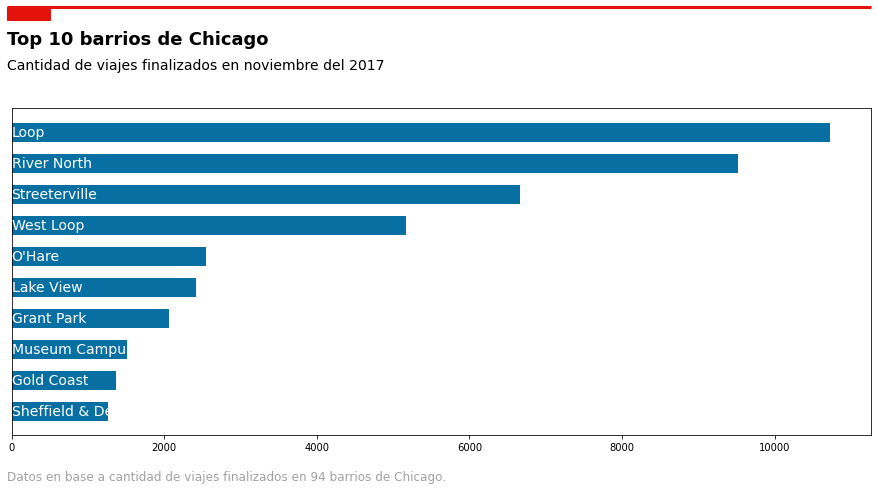

In [46]:
# Guardamos los nombres y cantidades de los 10 mejores en nuevas variables
top_neighborhoods = zuber_sql_result_04['dropoff_location_name'].head(10)
top_neighborhoods_trips = zuber_sql_result_04['average_trips'].head(10)

# Las ordenamos ascendentemente
top_neighborhoods = top_neighborhoods[::-1]
top_neighborhoods_trips = top_neighborhoods_trips.sort_values(ascending=True)

# La posición de las barras que nos permitirá determinar donde serán localizadas
z = [i * 0.9 for i in range(len(top_neighborhoods))]

# Los colores que usaremos en el gráfico
blue = "#076fa2"
red = "#E3120B"
grey = "#a2a2a2"

# Nuestro gráfico de barras horizontal
fig, az = plt.subplots(figsize=(12, 7))
az.barh(z, top_neighborhoods_trips , height=0.55, align='edge', color=blue)

# Escondemos las etiquetas del eje y
az.yaxis.set_visible(False)

# Agregamos las etiquetas
PAD = 0.3
for neighborhoods, trips, z_pos in zip(top_neighborhoods, top_neighborhoods_trips, z):
    az.text(
        PAD, z_pos + 0.5 / 2, neighborhoods, 
        color='white', fontfamily='DejaVu Sans', fontsize=14, va="center",
        path_effects=None
    ) 

# Ajustamos la posición del gráfico
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.15)

# Añadimos el título
fig.text(
    0, 0.925, "Top 10 barrios de Chicago", 
    fontsize=18, fontweight="bold", fontfamily='DejaVu Sans'
)
# Añadimos subtítulo
fig.text(
    0, 0.875, "Cantidad de viajes finalizados en noviembre del 2017", 
    fontsize=14, fontfamily='DejaVu Sans'
)

# Leyenda bajo el gráfico
source = "Datos en base a cantidad de viajes finalizados en 94 barrios de Chicago."
fig.text(
    0, 0.06, source, color=grey, 
    fontsize=12, fontfamily='DejaVu Sans'
)

# Añadimos una línea y rectángulo para la presentación del gráfico
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=red, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=red))

- Confirmamos las diferencias apreciadas anteriormente entre el cuarto y quinto lugar; pero también, nos queda claro que entre el primer lugar y el cuarto se produce una diferencia importante (dobla practicamente la cantidad de viajes).
- Los primeros cuatro puestos destacan bastante, en los que "Loop" y "River North" llevan una delantera clara y es más estrecha su distancia.

Veamos la participación de estos 10 lugares en relación a todos los otros barrios:

<AxesSubplot:title={'center':'Participación de los barrios de Chicago en cantidad de viajes finalizados'}, ylabel='average_trips'>

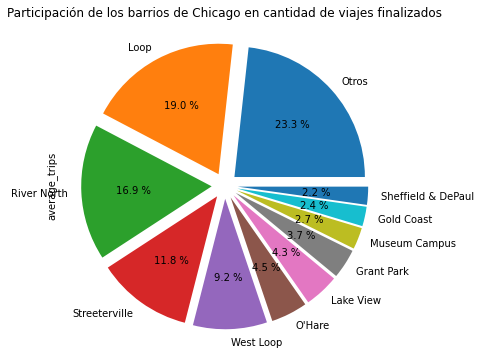

In [47]:
# Creamos una copia de nuestro dataset
grouped_neighborhoods_df = zuber_sql_result_04.copy(deep=True)

# Creamos un ciclo for para atribuir la categoría "otros" a partír del índice 5 ( del 0 al 4 son nuestro top 5)
for i in grouped_neighborhoods_df.index:
    if i > 9:
        grouped_neighborhoods_df.loc[i, 'dropoff_location_name'] = 'Otros'

#Graficamos agregando la suma de los barrios restantes
grouped_neighborhoods_df.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False).plot(
    kind='pie', title= 'Participación de los barrios de Chicago en cantidad de viajes finalizados', 
    figsize=(6,6), autopct='%0.1f %%', explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))

#plt.xlabel('En base a la cantidad de viajes realizados en noviembre del 2017.')

- El barrio "Loop" posee una cantidad cercana de viajes finalizados que el resto de 84 barrios en Chicago.
- Si juntamos los 4 barrios principales y con mayor diferencia que apreciamos antes, estos superan al resto de 80 barrios de Chicago.
- Dejando de lado estos cuatro primeros lugares, la distribución de los siguientes barrios es similar y más estrecha.

Veamos algunos valores contemplando los 94 barrios:

In [48]:
# Utilizamos el método describe para visualizar la media
zuber_sql_result_04.describe()

,average_trips,daily_trips,percent
count,94.000000,94.000000,94.000000
mean,599.478723,19.521277,1.063617
std,1714.555974,57.145490,3.043025
min,1.000000,0.000000,0.000000
25%,14.000000,0.000000,0.020000
50%,51.500000,1.000000,0.090000
75%,298.750000,9.000000,0.530000
max,10727.000000,357.000000,19.040000


- La media de viajes finalizados por barrio es de 51. Es una cifra muy distante a los 10727 que tiene el barrio "Loop".
- El 75% de barrios presenta cifras bajo los 300 viajes finalizados, de los cuales existe un barrio que solo tuvo 1 viaje finalizado.
- Reafirmamos la gran concentración de viajes para los primeros lugares; considerando que "Loop" logra un promedio diario de 357 viajes finalizados mientras que si consideramos la mediana total de viajes diarios finalizados, es solo de 1.

**Existe una gran diferencia entre los primeros lugares respecto de los 90 barrios restantes.**


#### Factores que pueden incidir en una mayor afluencia en ciertos barrios de Chicago

Los barrios destacados: **Loop, River North, Streeterville y West Loop**; pueden tener una mayor concurrencia por distintos factores:

    - Presencia de centros comerciales.
    - Conectividad con otras ciudades.
    - Barrios de alta densidad poblacional.
    - Etc.
    
Observarémos gráficamente el posicionamiento de cada barrio para ver si pueden darnos alguna pista.

**Mapa de Chicago y sus barrios:**

<img src=https://images2.imgbox.com/fd/7b/YIeNzrrV_o.jpg>

[Mapa de los barrios de Chicago](https://data.cityofchicago.org/widgets/bbvz-uum9?mobile_redirect=true)

La imagen presenta el área de Chicago; sus barrios están ensombrecidos y delimitados por trazos en negrita.

De acuerdo a lo observado en el mapa, podemos suponer lo siguiente:

    - Los barrios más concurridos son precisamente los que se encuentran en el centro de la ciudad.
    - Los 4 barrios en el top son todos colindantes.
    - Además de estar en el centro, son barrios cercanos a la costa, donde precisamente se puede potenciar 
    la actividad comercial y de transporte.

#### Conclusiones respecto a los barrios de Chicago y cantidad de viajes finalizados en cada uno

A partir de un dataset con datos de nombres de barrios de chicago (locaciones donde se dejó al cliente) y la cantidad promedio de viajes finalizados para cada barrio en noviembre de 2017; se añadieron dos columnas: el promedio de viajes finalizado diario y el porcentaje de representación de cada barrio respecto al total de viajes.


Tenemos la información de 94 barrios en los cuales se contempla una cantidad total de 56 mil viajes.

Luego de ordenar nuestros datos, como resultado tenemos un ranking de los 10 barrios más concurridos:

    1. Loop
    2. River North
    3. Streeterville
    4. West Loop
    5. O'Hare
    6. Grant Park
    7. Lake View
    8. Museum Campus
    9. Gold Coast
    10. Sheffield & DePaul
    
**Respecto a este ranking, podemos concluír:**
- "Loop" posee 11 mil viajes finalizados durante noviembre, alcanzando una media aproximada de 357 viajes por día. Esto dista bastante de la mediana general diaria que es solo de 1 viaje diario. La fuerte popularidad de "Loop" lo convierte en un barrio que concentra más visitas que el resto de 84 barrios que quedan fuera del top 10.
- Los barrios que le siguen, mantienen altas cifras; en especial, si consideramos los primeros 4 puestos. Estos barrios alcanzan a tener más de la mitad de los viajes de todos los barrios de Chicago.


La media general para el mes de noviembre es de 51 viajes realizados, una cifra muy distante del primer lugar. Consideramos también que al menos el 75% de los barrios presentan menos de 300 viajes.

No tenemos más datos para determinar la razón de las diferencias, sin embargo, profundizamos el análisis mediante la observación de un mapa de los barrios de Chicago. Esto nos llevó a las siguintes conclusiones:
- Los 4 barrios con números más altos se ubican en el corazón de la ciudad.
- Todos estos barrios son colindantes.
- Se ubican cerca de área costera, donde se puede presentar mayor actividad comercial y de transporte.

## Prueba de Hipótesis

Debemos comprobar la siguiente hipótesis:

**La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.**


Entonces, debemos crear dos tablas a partir de nuestro dataset:
- La primera, contendrá los registros de los sábados donde la condición meteorológica sea de lluvia.
- La segunda, todos los demás registros exceptuando los sábados lluviosos.

Para esto:
- Aprovecharemos el tipo de datos datetime en la columna "start_ts" para detectar los sábados.
- Supondremos que el clima lluvioso está asimilado como la categoría "Bad".

### Separando los sábados lluviosos

In [49]:
# Creamos una lista para alojar los sábados lluviosos
rainy_saturdays = []

# Creamos un ciclo for para ir agregando registros según las condiciones
for i in new_zuber_sql_result_07.index:
    if new_zuber_sql_result_07.loc[i, 'start_ts'].weekday() == 5 and new_zuber_sql_result_07.loc[i, 'weather_conditions'] == 'Bad':
        rainy_saturdays.append([new_zuber_sql_result_07.loc[i, 'start_ts'], 
                                new_zuber_sql_result_07.loc[i, 'weather_conditions'],
                                new_zuber_sql_result_07.loc[i, 'duration_seconds']])

# Creamos un dataframe a partir de los resultados        
rainy_saturdays_df = pd.DataFrame(rainy_saturdays, columns=['start_ts', 'weather_conditions', 'duration_seconds'])

# Mostramos como queda
rainy_saturdays_df

,start_ts,weather_conditions,duration_seconds
0,2017-11-04 16:00:00,Bad,2969
1,2017-11-18 12:00:00,Bad,1980
2,2017-11-04 17:00:00,Bad,2460
3,2017-11-04 16:00:00,Bad,2760
4,2017-11-18 12:00:00,Bad,2460
...,...,...,...
175,2017-11-18 12:00:00,Bad,2560
176,2017-11-18 10:00:00,Bad,1908
177,2017-11-18 12:00:00,Bad,2400
178,2017-11-18 16:00:00,Bad,2186


Tenemos 180 sábados lluviosos. Ahora crearemos otro dataframe pero considerando lo inverso

In [50]:
# Creamos una lista para alojar los sábados lluviosos
another_days = []

# Creamos un ciclo for para ir agregando registros según las condiciones
for i in new_zuber_sql_result_07.index:
    if new_zuber_sql_result_07.loc[i, 'start_ts'].weekday() == 5 and new_zuber_sql_result_07.loc[i, 'weather_conditions'] == 'Good':
        another_days.append([new_zuber_sql_result_07.loc[i, 'start_ts'], 
                                new_zuber_sql_result_07.loc[i, 'weather_conditions'],
                                new_zuber_sql_result_07.loc[i, 'duration_seconds']])
        
    elif new_zuber_sql_result_07.loc[i, 'start_ts'].weekday() != 5:
        another_days.append([new_zuber_sql_result_07.loc[i, 'start_ts'], 
                                new_zuber_sql_result_07.loc[i, 'weather_conditions'],
                                new_zuber_sql_result_07.loc[i, 'duration_seconds']])
        
        
# Creamos un dataframe a partir de los resultados        
another_days_df = pd.DataFrame(another_days, columns=['start_ts', 'weather_conditions', 'duration_seconds'])

# Mostramos como queda
another_days_df

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
876,2017-11-04 14:00:00,Good,2700
877,2017-11-11 06:00:00,Good,1500
878,2017-11-11 10:00:00,Good,1318
879,2017-11-11 13:00:00,Good,2100


Ahora tenemos los 881 registros faltantes, sumados a los 180 de los sábados lluviosos, completamos los 1061 registros del dataset.

Podemos proceder a probar nuestra hipótesis, pero antes, generamos listas con los dataset obtenidos.

In [51]:
# Listas a partir de los segundos
rainy_saturdays_duration = rainy_saturdays_df['duration_seconds']
another_days_duration = another_days_df['duration_seconds']

### Probando la hipótesis

Necesitamos fijar nuestro **umbral para la significación estadística:**

Considerarémos un valor del 5% para nuestro umbral, esto quiere decir que; un 5% de probabilidad de obtener un resultado como el que consideramos, es demasiado bajo; por esto estamos dispuestos a rechazar la hipótesis nula, ya que el valor real resultó estar muy lejos del propuesto.

#### Prueba de Levene

Realizaremos la prueba de Levene para determinar nuestro valor "equal_var" a ser utilizado en las pruebas t.

**Nuestra hipótesis nula será que las varianzas del tiempo en ambos dataframes son iguales.**

In [52]:
# Prueba de Levene
duration_trips_levene = st.levene(rainy_saturdays_duration, another_days_duration, center='mean')
duration_trips_levene.pvalue

0.5363422476928026

Nuestro valor pvalue = 0.53 es bastante más alto que el 0.05 que fijamos como nivel de significancia, por lo tanto, no podemos rechazar nuestra hipótesis nula de que las varianzas son iguales; por lo tanto, fijaremos nuestro valor de "equal_var" como True.

#### Pruebas T

**Hipótesis:**  "*La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos*."

Para trabajar en esta hipótesis separámos los datos y construímos dos muestras en base a las condiciones requeridas.

**Nuestra hipótesis nula es:**

 - La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma no importando si es sábado y el clima es lluvioso.
 
**Nuestra hipótesis alternativa será:**

- La duración promedio de los viajes desde el barrio Loop hasta el Aeropuerto Internacional O'Hare cambia si es un sábado y está lloviendo.

In [53]:
# Umbral de significación
alpha = 0.05

# Probamos la hipótesis de que la duración de viaje desde el barrio Loop al aeropuerto es la misma
duration_results = st.ttest_ind(rainy_saturdays_duration, another_days_duration, equal_var=True)
duration_results.pvalue

1.5028117595948955e-11

El resultado de la probabilidad es bastante bajo, por lo tanto nuestro alpha es mayor. Es decir, rechazamos la hipótesis nula.

Podemos concluir que no existe igualdad entre las duraciones de los viajes para días sábado y con lluvia.

#### Resultado de nuestra hipótesis

**Nuestra hipótesis:** 
"*La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.*"

**Es aceptada.**

Los tiempos de duración pueden variar si el viaje se realiza un día sábado y la condición es de lluvia.

## Conclusiones

Trabajamos con tres archivos que nos presentaron distinta información:

    1. Compañías de taxis y cantidad de viajes
    2. Barrios de chicago y cantidad de viajes finalizados en cada uno
    3. Registros detallados de viajes desde el barrio Loop al aeropuerto.
    

**Respecto al primer archivo:**

Tenemos la información de 64 compañías de taxis y las respectivas cantidades de viajes realizados el 15 y 16 de noviembre del 2017. Obtuvimos que las empresas con mayor cantidad de viajes tienen una diferencia considerable respecto a la media. Destacamos los primeros cinco lugares:

    1. Flash Cab
    2. Taxi Affiliation Services
    3. Medallion Leasing
    4. Yellow Cab
    5. Taxi Affiliation Service Yellow

Flash Cab se consagra en primer lugar con casi 20 mil viajes en estos dos días; y llega a representar un 14,2% de los viajes totales e incluso llega casi a duplicar a su seguidor más cercano.

Si bien no poseemos más datos para clarificar las diferencias, podemos especular que pue ser por alguna de estas razones:

- Las compañías más exitosas presentan nombres cortos y de fácil recordación.
- Las compañías con menos viajes parecen pertenecer a particulares.


**Respecto al segundo archivo:**

Tenemos 94 barrios de chicago y contamos con el promedio de viajes finalizados por cada barrio en noviembre del 2017.

*Los viajes finalizados cuentan como el lugar donde fue dejado el cliente.*

Luego del análisis, determinamos que la diferencia más grande se aprecia a partir de los 4 barrios que presentan mayor cantidad de finalizaciones de viaje.

    1. Loop
    2. River North
    3. Streeterville
    4. West Loop
    
Loop se presenta como el barrio más popular con cerca de 11 mil viajes finalizados en noviembre del 2017. Se distancia bastante de la media ya que contempla al menos 357 viajes al día, mientras que la mediana tiende a solo 1 viaje por día.

Los otros tres barrios en los primeros lugares contemplan una cifra importante, de hecho, si consideramos los viajes de estos cuatro barrios, alcanzamos a tener más de la mitad de viajes en todo Chicago.

Realizando una observación del mapa de los barrios de Chicago podemos concluir algunas razones de la alta demanda para estos sectores:

- Los 4 barrios con números más altos se ubican en el centro de la ciudad (zona portuaria además) y todos son vecinos.

**Respecto a la hipótesis planteada:**

Gracias a las pruebas T podemos concluir que nuestra hipótesis es cierta; es decir, la duración promedio de los viajes desde el barrio Loop hasta el Aeropuerto Internacional O'Hare es distinta los días sábados lluviosos.


Para finalizar, la información reunida en estos tres archivos nos da cuenta de que debemos tener especial atención a ciertas características a la hora de instalar una empresa de transporte en la ciudad de Chicago:

- Existen compañías de taxis que sobresalen por lo que sería necesario profundizar el comportamiento de estas y qué las hace tan especiales.

- La principal demanda está concentrada en los cuatro barrios céntricos de la ciudad.

- La condición climática puede alterar el tiempo de tardanza desde el barrio principal hacia el aeropuerto; un factor importante a considerar teniendo en cuenta que es necesario cumplir con horarios estrictos para que los pasajeros no pierdan sus vuelos.